In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('../../../letter_korean_corpus.csv')
letter = data

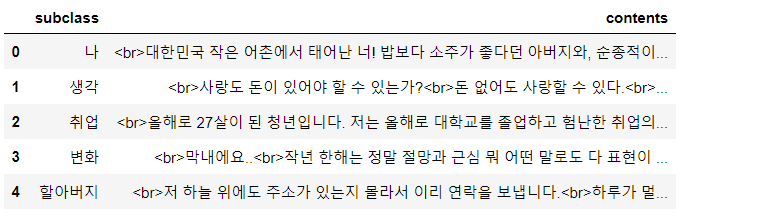

# 데이터 전처리

In [6]:
stopwords = [
    'stop', 'words'
]

In [9]:
from konlpy.tag import Okt
tagger = Okt()

# 편지 내용 가져오기
contents = letter['contents']

def preprocessing(text):
    # <br>제거
    text = text.replace("<br>", " ")
    
    # 형태소 분석
    okt_pos = tagger.pos(text, norm=True, stem=True)
    
    # 명사, 동사, 형용사 사용
    words = [word for word, hts in okt_pos if hts in ['Noun','Adjective', 'Verb']]
    
    # 스탑 워드 적용
    words = [word for word in words if word not in stopwords]
    
    #리스트 문자열로 변경
    pure_string = ' '.join(words)
    
    return pure_string

content = list(contents.apply(preprocessing))

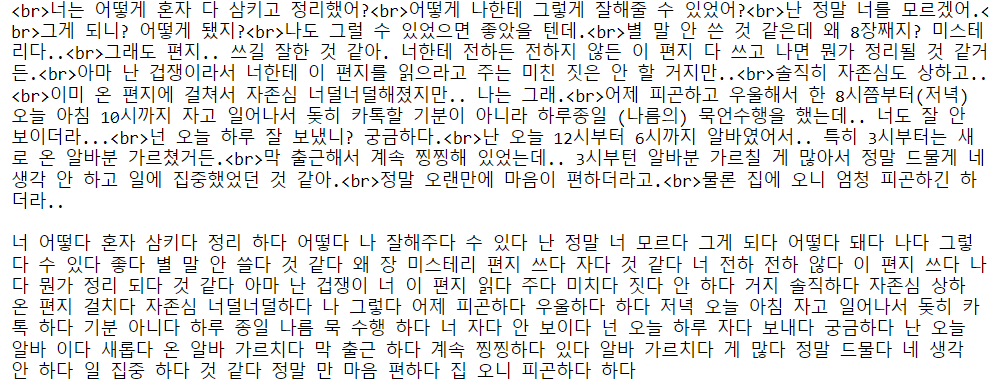

# 자주 등장하는 단어, tf-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
words_vectors = vectorizer.fit_transform(content).toarray()

words_vectors = pd.DataFrame(words_vectors)

In [21]:
def index_to_word(search_num):
    """tf-idf의 vocab이 매칭하는 숫자를 단어로 바꿔주는 함수,
       EX) 0번 단어 -> '사랑' 
    """
    words = vectorizer.vocabulary_
    
    for word, wordnum in words.items():
        if wordnum == search_num:
            return word

In [24]:
# 단어 1,2,3 순위 랭킹 리스트로 반환
index_rank_datafarme = pd.DataFrame(columns=['idf_1st', 'idf_2nd', 'idf_3rd'])

for index in range(len(words_vectors)):
    arow = words_vectors.iloc[index]
    arow = arow.sort_values(ascending=False)[0:3]
    
    str_index = []
    for key, value in arow.items():
        if value != 0.0:
            str_index.append(index_to_word(key))
    
    # 편지를 데이터 형변한 후 단어가 2개 이하인 경우 남은 컬럼을 -1로 채워줌
    # 데이터 프래임을 만들때 컬럼수가 다르면 만들 수 없기 때문에 처리
    for i in range(3):
        if len(str_index) < 3:
            str_index.append(-1)
            
    index_rank_datafarme.loc[index] = str_index

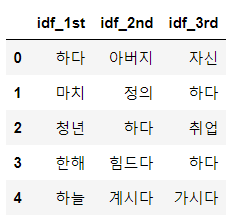

# CSV 파일 내보내기

In [26]:
index_rank_datafarme.to_csv("letter_tf_idf_ranking.csv", index=False)

# 불용어 처리

In [106]:
#불용어 처리 위한 상위 단어 리스트
index_sorted_string_list = []

for index in range(len(pcadata)):
    arow = pcadata.loc[index]
    arow = arow.sort_values(ascending=False)[0:20]
    
    for key, value in arow.items():
        if value != 0.0:
            index_sorted_string_list.append(index_to_word(key))

In [107]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(index_sorted_string_list).most_common(1000))

# 자주 등장하는 단어에 불용어가 있으면 stopwords로 추가해서 불용어 처리
# "하다", "있다" 등등

{'생각': 63,
 '좋다': 60,
 '사랑': 55,
 '사람': 51,
 '당신': 50,
 '우리': 49,
 '엄마': 40,
 '자다': 36,
 '편지': 32,
 '싶다': 29,
 '지내다': 25,
 '마음': 25,
 '행복하다': 24,
 '살다': 24,
 '아프다': 23,
 '보내다': 23,
 '고맙다': 23,
 '친구': 23,
 '정말': 23,
 '모습': 23,
 '시간': 22,
 '그냥': 21,
 '기억': 21,
 '만나다': 20,
 '차다': 19,
 '모르다': 19,
 '좋아하다': 19,
 '그때': 19,
 '언니': 19,
 '많다': 19,
 '연락': 18,
 '아빠': 18,
 '먹다': 17,
 '힘들다': 17,
 '쓰다': 16,
 '미안하다': 16,
 '이야기': 15,
 '이름': 15,
 '선생님': 15,
 '눈물': 15,
 '진짜': 15,
 '추억': 15,
 '감정': 14,
 '받다': 14,
 '어리다': 14,
 '너희': 14,
 '감사하다': 14,
 '보고': 13,
 '되어다': 13,
 '싫다': 13,
 '아이': 13,
 '생일': 13,
 '항상': 13,
 '주다': 13,
 '태어나다': 12,
 '세상': 12,
 '처음': 12,
 '드리다': 12,
 '가족': 12,
 '버리다': 12,
 '놀다': 12,
 '순간': 12,
 '아주': 12,
 '사실': 12,
 '대한': 11,
 '하늘': 11,
 '얘기': 11,
 '미래': 11,
 '소리': 11,
 '계속': 11,
 '인생': 11,
 '공부': 11,
 '예쁘다': 11,
 '그대': 11,
 '잊다': 11,
 '자신': 10,
 '힘드다': 10,
 '여전하다': 10,
 '바라다': 10,
 '떠나다': 10,
 '나오다': 10,
 '걱정': 10,
 '울다': 10,
 '상처': 10,
 '축하': 10,
 '헤어지다': 10,
 '돼다': 10,
 '오늘': 10,
